In [1]:
import numpy as np
import pandas as pd

In [2]:
df_lsd_filled = pd.read_csv("/content/drive/MyDrive/TCC/foward_fill/df_lsd_foward_fill.csv")
df_ceei_filled=pd.read_csv("/content/drive/MyDrive/TCC/foward_fill/df_ceei_foward_fill.csv")
df_splab_filled=pd.read_csv("/content/drive/MyDrive/TCC/foward_fill/df_splab_foward_fill.csv")
df_cn_filled=pd.read_csv("/content/drive/MyDrive/TCC/foward_fill/df_cn_foward_fill.csv")
df_ctlabs_filled=pd.read_csv("/content/drive/MyDrive/TCC/foward_fill/df_ctlabs_foward_fill.csv")

In [3]:
df_lsd_filled['Data'] = pd.to_datetime(df_lsd_filled['Data'])
df_ceei_filled['Data'] = pd.to_datetime(df_ceei_filled['Data'])
df_splab_filled['Data'] = pd.to_datetime(df_splab_filled['Data'])
df_cn_filled['Data'] = pd.to_datetime(df_cn_filled['Data'])
df_ctlabs_filled['Data'] = pd.to_datetime(df_ctlabs_filled['Data'])

In [4]:
def remove_outlier(df):
  Q1 = np.percentile(df['total_w'].to_list(), 25)
  Q3 = np.percentile(df['total_w'].to_list(), 75)

  # Calcular os limites superior e inferior usando a fórmula fornecida
  limite_inferior = Q1 - 1.5 * (Q3 - Q1)
  limite_superior = Q3 + 1.5 * (Q3 - Q1)

  # Substituir outliers pelos limites
  df['total_w'] = [x if (x >= limite_inferior and x <= limite_superior) else limite_inferior if x < limite_inferior else limite_superior for x in df['total_w'].to_list()]
  return df

In [5]:
df_lsd_processed = remove_outlier(df_lsd_filled)
df_ceei_processed = remove_outlier(df_ceei_filled)
df_splab_processed = remove_outlier(df_splab_filled)
df_cn_processed = remove_outlier(df_cn_filled)
df_ctlabs_processed = remove_outlier(df_ctlabs_filled)

In [6]:
import seaborn as sns

[Text(0.5, 1.0, 'Consumo de Wats pelo LSD'),
 Text(0, 0.5, 'Total de Wats'),
 Text(0.5, 0, 'Data')]

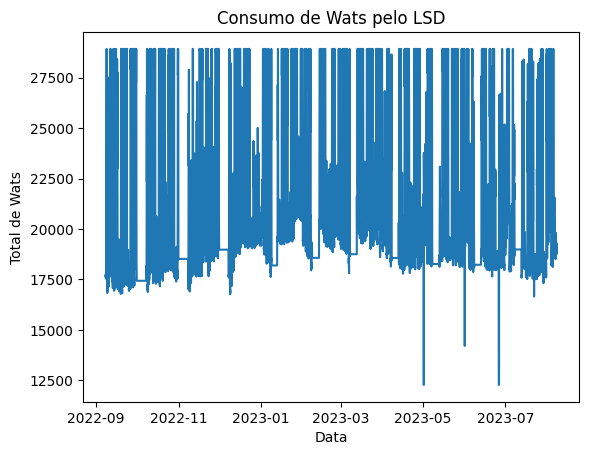

In [7]:
sns.lineplot(df_lsd_processed,x='Data',y='total_w').set(title = "Consumo de Wats pelo LSD",ylabel='Total de Wats', xlabel='Data')

In [ ]:
df_lsd_processed.to_csv("/content/drive/MyDrive/TCC/drop_outliers/df_lsd_processed.csv",index=False)
df_ceei_processed.to_csv("/content/drive/MyDrive/TCC/drop_outliers/df_ceei_processed.csv",index=False)
df_splab_processed.to_csv("/content/drive/MyDrive/TCC/drop_outliers/df_splab_processed.csv",index=False)
df_cn_processed.to_csv("/content/drive/MyDrive/TCC/drop_outliers/df_cn_processed.csv",index=False)
df_ctlabs_processed.to_csv("/content/drive/MyDrive/TCC/drop_outliers/df_ctlabs_processed.csv",index=False)